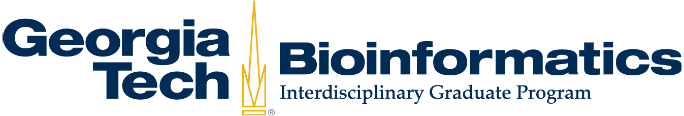

<div class="alert alert-block alert-info">
    <h1>BIOS 4150/BIOL 6150</h1>
    <h3>Instructor: Dr. King Jordan</h3>
    <p>TAs: Shivam Sharma (shivamsharma13@gatech.edu) & Vishva Natarajan (vishvanata@gatech.edu)</p>
</div>

<div class="alert alert-block alert-warning">
    <h2>Project 4 (Ploygenic Risk Scores) starter notebook</h2>
    <h3>Deadline: 11:59PM, November 15th, 2023</h3>
</div>

<div class="alert alert-block alert-danger">
    <h2>Alert!</h2>
    <p>Do not delete any comments or information boxes the starter notebook comes with</p>
</div>

---

# **1. Knowing your data**
### *Total Questions: 6*
### *Total Points: 5+5+10+10+20+30 = 80*


---

<div class="alert alert-block alert-warning">
    <h3>1.1 Your Phenotype and Population of interest</h3>
    <p>You will find this in the announcement section of your group</p>
</div>

<div class="alert alert-block alert-success">
    <h3>Response 1.1</h3> 
    <p>Our disease of interest is: Hemoglobin A1C and our population of interest is: South Asian </p>
</div>

<div class="alert alert-block alert-warning">
    <h3>1.2 Check source VCF file</h3>
    <p>Show that you can access these VCF files. Show the first 10 variant IDs from chromosome 15.</p>
</div>

In [1]:
#For this project, you will use VCF file from phase 3 1000Genomes.
!ls -lh /storage/ice-shared/biol6150/Data/1000GenomesAll/ | head -n 30

total 15G
-rw-r--r-- 1 ssharma454 gtperson 742M Aug  4  2021 phase3.chr10.GRCh38.GT.crossmap.vcf.gz
-rw-r--r-- 1 ssharma454 gtperson 123K Aug  4  2021 phase3.chr10.GRCh38.GT.crossmap.vcf.gz.tbi
-rw-r--r-- 1 ssharma454 gtperson 736M Aug  4  2021 phase3.chr11.GRCh38.GT.crossmap.vcf.gz
-rw-r--r-- 1 ssharma454 gtperson 123K Aug  4  2021 phase3.chr11.GRCh38.GT.crossmap.vcf.gz.tbi
-rw-r--r-- 1 ssharma454 gtperson 711M Aug  4  2021 phase3.chr12.GRCh38.GT.crossmap.vcf.gz
-rw-r--r-- 1 ssharma454 gtperson 123K Aug  4  2021 phase3.chr12.GRCh38.GT.crossmap.vcf.gz.tbi
-rw-r--r-- 1 ssharma454 gtperson 534M Aug  4  2021 phase3.chr13.GRCh38.GT.crossmap.vcf.gz
-rw-r--r-- 1 ssharma454 gtperson  91K Aug  4  2021 phase3.chr13.GRCh38.GT.crossmap.vcf.gz.tbi
-rw-r--r-- 1 ssharma454 gtperson 482M Aug  4  2021 phase3.chr14.GRCh38.GT.crossmap.vcf.gz
-rw-r--r-- 1 ssharma454 gtperson  83K Aug  4  2021 phase3.chr14.GRCh38.GT.crossmap.vcf.gz.tbi
-rw-r--r-- 1 ssharma454 gtperson 439M Aug  4  2021 phase3.chr15.GRCh38

In [13]:
#Show the first 10 variant IDs from chromosome 15. You bash command goes here.
#done
!zcat /storage/ice-shared/biol6150/Data/1000GenomesAll/phase3.chr15.GRCh38.GT.crossmap.vcf.gz | grep -v "^#" | cut -f3 | head -n 10

rs371549847
rs565090028
rs201219124
rs373298708
rs560310552
rs552896638
rs542841371
rs561207761
rs531597354
rs61997842
cut: write error: Broken pipe


<div class="alert alert-block alert-warning">
    <h3>1.3 How many samples are present in these set of VCF files</h3>
    <p>You can do this using a series of bash commands, or a tool of your choice. But you have to show how you got the total number. You don't have to run this on all VCF files. Just one will work.</p>
</div>

In [16]:
#Get the samples present in the VCF file.
#done
!zcat /storage/ice-shared/biol6150/Data/1000GenomesAll/phase3.chr15.GRCh38.GT.crossmap.vcf.gz | grep '^#CHROM' | head -1 | awk '{print NF-9}'

2504


<div class="alert alert-block alert-warning">
    <h3>1.4 How many variants are present in chromosome 12 VCF file</h3>
    <p>Use a tools or a bash command. Up to you.</p>
</div>

In [17]:
#Your command for getting the number of variants here.
!bcftools view -H /storage/ice-shared/biol6150/Data/1000GenomesAll/phase3.chr12.GRCh38.GT.crossmap.vcf.gz |  wc -l


3885458


<div class="alert alert-block alert-warning">
    <h3>1.5 Indexing VCF files</h3>
    <p><b>1.5.1</b> Do the VCF files have a matched tabix file in the shared directory?</p>
    <p><b>1.5.1</b> Using tabix, write the number of variants that lie between genomic positions 15,000,000-15,500,500 on chromosome 22?</p>
</div>

1.5.1
The VCF files do have matched tabix files in the shared directory.

In [1]:
#1.5.2
!tabix /storage/ice-shared/biol6150/Data/1000GenomesAll/phase3.chr22.GRCh38.GT.crossmap.vcf.gz chr22:15000000-15500500 | wc -l

4997


<div class="alert alert-block alert-warning">
    <h3>1.6 Extract the samples of interest</h3>
    <p>You have source 1000 genomes files and a continental population of interest.</p>
    <p><b>1.6.1</b> Write the 1000 genomes population that come from the continental population of interest</p>
    <p><b>1.6.2</b> Extract the samples that come from this population. The final output will be a set of 22 VCF GZ files that have a fraction of total samples present in the source VCF file. <b>Show and briefly explain any helper files you have used for this step.</b></p>
    <p><b>1.6.3</b> How many samples are present in your final VCF file?</p>
</div>

In [11]:
#Write the 3 letter codes of the populations of interest.

<span style="color:red">1.6.1<br>
Super population --> <br>
SAS: South Asian <br>
Sub population --> <br>
GIH: Gujarati Indian in Houston, TX<br>
PJL: Punjabi in Lahore, Pakistan<br>
BEB: Bengali in Bangladesh<br>
STU: Sri Lankan Tamil in the UK<br>
ITU: Indian Telugu in the UK    
</span>



In [ ]:
# # using this link - https://ftp.1000genomes.ebi.ac.uk/vol1/ftp/README_populations.md
# !wget -P ~/biol6150/ProjectSubmissions/Group19/Project4/tr ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/20131219.populations.tsv
# !wget -P ~/biol6150/ProjectSubmissions/Group19/Project4/tr ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/20131219.superpopulations.tsv


<span style="color:red">Downloaded the tsv files from 1000genome website for the above mentioned sub-population 
</span>



<span style="color:red">Concated everything to single file for future use</span>



In [28]:
!cut -f 1 ~/biol6150/ProjectSubmissions/Group19/Project4/tr/igsr-stu.tsv.tsv >> ~/biol6150/ProjectSubmissions/Group19/Project4/tr/Subpop_list.txt

In [ ]:
# cut -f 1 igsr-beb.tsv.tsv > combined.txt
# cut -f 1 igsr-gih.tsv.tsv >> combined.txt
# cut -f 1 igsr-itu.tsv.tsv >> combined.txt
# cut -f 1 igsr-pjl.tsv.tsv >> combined.txt
# cut -f 1 igsr-stu.tsv.tsv >> combined.txt


In [1]:
# Example command using bcftools to extract samples of interest
!seq 22 | xargs -I{} -P 22 -n 1 bash -c "bcftools view -Oz -S ~/biol6150/ProjectSubmissions/Group19/Project4/tr/Subpop_list.txt --force-samples /storage/ice-shared/biol6150/Data/1000GenomesAll/phase3.chr{}.GRCh38.GT.crossmap.vcf.gz > ~/biol6150/ProjectSubmissions/Group19/Project4/ExtractedFiles/extracted_chr{}.vcf.gz --threads 24"

Warn: subset called for sample that does not exist in header: "Sample name"... skipping
Warn: subset called for sample that does not exist in header: "HG03008"... skipping
Warn: subset called for sample that does not exist in header: "HG03617"... skipping
Warn: subset called for sample that does not exist in header: "HG03605"... skipping
Warn: subset called for sample that does not exist in header: "HG03794"... skipping
Warn: subset called for sample that does not exist in header: "HG03799"... skipping
Warn: subset called for sample that does not exist in header: "HG03807"... skipping
Warn: subset called for sample that does not exist in header: "HG03596"... skipping
Warn: subset called for sample that does not exist in header: "HG03798"... skipping
Warn: subset called for sample that does not exist in header: "HG03801"... skipping
Warn: subset called for sample that does not exist in header: "HG03903"... skipping
Warn: subset called for sample that does not exist in header: "HG03915".

Warn: subset called for sample that does not exist in header: "HG03590"... skipping
Warn: subset called for sample that does not exist in header: "HG03795"... skipping
Warn: subset called for sample that does not exist in header: "HG03834"... skipping
Warn: subset called for sample that does not exist in header: "HG03822"... skipping
Warn: subset called for sample that does not exist in header: "HG03831"... skipping
Warn: subset called for sample that does not exist in header: "HG03904"... skipping
Warn: subset called for sample that does not exist in header: "HG03909"... skipping
Warn: subset called for sample that does not exist in header: "HG04192"... skipping
Warn: subset called for sample that does not exist in header: "HG04135"... skipping
Warn: subset called for sample that does not exist in header: "HG04142"... skipping
Warn: subset called for sample that does not exist in header: "HG04147"... skipping
Warn: subset called for sample that does not exist in header: "HG03797"... s

Warn: subset called for sample that does not exist in header: "Sample name"... skipping
Warn: subset called for sample that does not exist in header: "HG03008"... skipping
Warn: subset called for sample that does not exist in header: "HG03617"... skipping
Warn: subset called for sample that does not exist in header: "HG03605"... skipping
Warn: subset called for sample that does not exist in header: "HG03794"... skipping
Warn: subset called for sample that does not exist in header: "HG03799"... skipping
Warn: subset called for sample that does not exist in header: "HG03807"... skipping
Warn: subset called for sample that does not exist in header: "HG03596"... skipping
Warn: subset called for sample that does not exist in header: "HG03798"... skipping
Warn: subset called for sample that does not exist in header: "HG03801"... skipping
Warn: subset called for sample that does not exist in header: "HG03903"... skipping
Warn: subset called for sample that does not exist in header: "HG03915".

Warn: subset called for sample that does not exist in header: "HG03590"... skipping
Warn: subset called for sample that does not exist in header: "HG03795"... skipping
Warn: subset called for sample that does not exist in header: "HG03834"... skipping
Warn: subset called for sample that does not exist in header: "HG03822"... skipping
Warn: subset called for sample that does not exist in header: "HG03831"... skipping
Warn: subset called for sample that does not exist in header: "HG03904"... skipping
Warn: subset called for sample that does not exist in header: "HG03909"... skipping
Warn: subset called for sample that does not exist in header: "HG04192"... skipping
Warn: subset called for sample that does not exist in header: "HG04135"... skipping
Warn: subset called for sample that does not exist in header: "HG04142"... skipping
Warn: subset called for sample that does not exist in header: "HG04147"... skipping
Warn: subset called for sample that does not exist in header: "HG03797"... s

In [23]:
#Extract the total number of samples present in your final VCF file.
total=0
for i in range(1,23):
    vcf_file=f"~/biol6150/ProjectSubmissions/Group19/Project4/ExtractedFiles/extracted_chr{i}.vcf.gz"
    num_samples=!bcftools query -l {vcf_file} | wc -l
    total += int(num_samples[0])
    print(vcf_file,"|",num_samples)
print(total)


~/biol6150/ProjectSubmissions/Group19/Project4/ExtractedFiles/extracted_chr1.vcf.gz | ['489']
~/biol6150/ProjectSubmissions/Group19/Project4/ExtractedFiles/extracted_chr2.vcf.gz | ['489']
~/biol6150/ProjectSubmissions/Group19/Project4/ExtractedFiles/extracted_chr3.vcf.gz | ['489']
~/biol6150/ProjectSubmissions/Group19/Project4/ExtractedFiles/extracted_chr4.vcf.gz | ['489']
~/biol6150/ProjectSubmissions/Group19/Project4/ExtractedFiles/extracted_chr5.vcf.gz | ['489']
~/biol6150/ProjectSubmissions/Group19/Project4/ExtractedFiles/extracted_chr6.vcf.gz | ['489']
~/biol6150/ProjectSubmissions/Group19/Project4/ExtractedFiles/extracted_chr7.vcf.gz | ['489']
~/biol6150/ProjectSubmissions/Group19/Project4/ExtractedFiles/extracted_chr8.vcf.gz | ['489']
~/biol6150/ProjectSubmissions/Group19/Project4/ExtractedFiles/extracted_chr9.vcf.gz | ['489']
~/biol6150/ProjectSubmissions/Group19/Project4/ExtractedFiles/extracted_chr10.vcf.gz | ['489']
~/biol6150/ProjectSubmissions/Group19/Project4/ExtractedFil

<span style="color:red">Total number of samples in extracted vcf files= 10758</span>



# **2. Annotating variants**
### *Total Questions: 2*
### *Total Points: 20+20+60 = 100*


---

<div class="alert alert-block alert-warning">
    <h3>2.1 Find clinically important genes</h3>
    <p>Different genes perform different functions in our body. Is there a way we can find clincically important genes for humans? Search on web and find a resource that can tell you which genes are clinically important (there can be multiple answers)</p>
</div>

In [14]:
#What was the resource that you identified? Give a 1-3 line description and the web link.

<span style="color:red">https://www.genecards.org/
<br>
We are using Gene card to find out the genes that are related to South Asian population.<br>
This page gives us a detailed information on summary of that particular gene and how many publications were given. <br>

    
</span>



<div class="alert alert-block alert-warning">
    <h3>2.2 Varints in those genes</h3>
    <p><b>2.2.1</b> For your population, can you identify a set of genes (3-8 genes; not a lot) that might be clinically relevant? If not, then try finding clincially important genes for all humans and use them.</p>
    <p><b>2.2.2</b> In any one of the genes identified above, can you find a variant (dbSNP ID) which has a HIGH or MODERATE variant effect consequence? <i>Hint:</i> https://useast.ensembl.org/info/genome/variation/prediction/predicted_data.html</p>
</div>

In [15]:
#You answers here.

<span style="color:red">TP53<br>HBB<br>SLCA41<br>BRCA1<br>BRCA2<br>   
</span>



In [11]:
!grep -E 'missense_variant.*MODERATE' ~/biol6150/ProjectSubmissions/Group19/Project4/SelectedGenes/extracted_chr11.HBB.Annotated.vcf

chr11	5225653	rs111645889	G	A	100.0	PASS	AC=0;AF=0.000199681;AN=978;NS=2504;DP=17000;EAS_AF=0;AMR_AF=0;AFR_AF=0.0008;EUR_AF=0;SAS_AF=0;AA=G|||;VT=SNP;EX_TARGET;ANN=A|missense_variant|MODERATE|HBB|ENSG00000244734|transcript|ENST00000335295.4|protein_coding|3/3|c.389C>T|p.Ala130Val|439/628|389/444|130/147||,A|missense_variant|MODERATE|HBB|ENSG00000244734|transcript|ENST00000647020.1|protein_coding|3/3|c.389C>T|p.Ala130Val|565/754|389/444|130/147||,A|3_prime_UTR_variant|MODIFIER|HBB|ENSG00000244734|transcript|ENST00000633227.1|nonsense_mediated_decay|3/3|n.*205C>T|||||1055|,A|upstream_gene_variant|MODIFIER|ENSG00000221031|ENSG00000221031|transcript|ENST00000408104.1|ribozyme||n.-1014C>T|||||1014|,A|upstream_gene_variant|MODIFIER|ENSG00000285498|ENSG00000285498|transcript|ENST00000644706.1|TEC||n.-192C>T|||||192|,A|downstream_gene_variant|MODIFIER|HBB|ENSG00000244734|transcript|ENST00000485743.1|protein_coding||c.*903C>T|||||610|,A|downstream_gene_variant|MODIFIER|HBB|ENSG00000244734|trans

In [ ]:
rs10768683 has missense_variant|MODERATE

<div class="alert alert-block alert-warning">
    <h3>2.3 Select a gene</h3>
    <p><b>2.3.1 </b>Select a clinically relevant gene from the list in <i>2.2.1</i> and create a new VCF file which:</p> 
    <p>1. Has all the samples from your continental population of interest</p>
    <p>2. Has only the variants which exist on the gene of interest</p>
    <p><b>Note:</b> If you end up with no variants, then try another gene. It is important that you find some variants before you move forward.
        <hr>
    <p><b>2.3.2 </b>How many individuals in the VCF file (subset of your continental population) carry a variant with a HIGH or MODERATE consequence (let's use ensembl consequence definitions for this question; as used above). Print their 1000 genomes ID.</p>
</div>

In [29]:
#using chr11 positions for HBB to out extracted vcf file
!bcftools view -r chr11:5225464-5227071 -Ov -o ~/biol6150/ProjectSubmissions/Group19/Project4/SelectedGenes/extracted_chr11.HBB.vcf ~/biol6150/ProjectSubmissions/Group19/Project4/ExtractedFiles/extracted_chr11.vcf.gz

In [ ]:
#annotated file
!snpEff -Xmx16g ann -v GRCh38.105 ~/biol6150/ProjectSubmissions/Group19/Project4/SelectedGenes/extracted_chr11.HBB.vcf > ~/biol6150/ProjectSubmissions/Group19/Project4/SelectedGenes/extracted_chr11.HBB.Annotated.vcf

In [31]:
#tsv file created
!cat ~/biol6150/ProjectSubmissions/Group19/Project4/SelectedGenes/extracted_chr11.HBB.Annotated.vcf | grep -v "##" | cut -f1-5,8 > ~/biol6150/ProjectSubmissions/Group19/Project4/SelectedGenes/extracted_chr11.HBB.Annotated.tsv

In [18]:
!head -n 10000 ~/biol6150/ProjectSubmissions/Group19/Project4/SelectedGenes/extracted_chr11.HBB.Annotated.vcf

##fileformat=VCFv4.1
##FILTER=<ID=PASS,Description="All filters passed">
##ALT=<ID=CNV,Description="Copy Number Polymorphism">
##ALT=<ID=DEL,Description="Deletion">
##ALT=<ID=DUP,Description="Duplication">
##ALT=<ID=INS:ME:ALU,Description="Insertion of ALU element">
##ALT=<ID=INS:ME:LINE1,Description="Insertion of LINE1 element">
##ALT=<ID=INS:ME:SVA,Description="Insertion of SVA element">
##ALT=<ID=INS:MT,Description="Nuclear Mitochondrial Insertion">
##ALT=<ID=INV,Description="Inversion">
##ALT=<ID=CN0,Description="Copy number allele: 0 copies">
##ALT=<ID=CN1,Description="Copy number allele: 1 copy">
##ALT=<ID=CN2,Description="Copy number allele: 2 copies">
##ALT=<ID=CN3,Description="Copy number allele: 3 copies">
##ALT=<ID=CN4,Description="Copy number allele: 4 copies">
##ALT=<ID=CN5,Description="Copy number allele: 5 copies">
##ALT=<ID=CN6,Description="Copy number allele: 6 copies">
##ALT=<ID=CN7,Description="Copy number allele: 7 copies">
##ALT=<ID=CN8,Description="Copy number all

chr11	5225610	rs36020563	G	A	100.0	PASS	AC=0;AF=0.000199681;AN=978;NS=2504;DP=15685;EAS_AF=0;AMR_AF=0;AFR_AF=0.0008;EUR_AF=0;SAS_AF=0;AA=G|||;VT=SNP;EX_TARGET;ANN=A|synonymous_variant|LOW|HBB|ENSG00000244734|transcript|ENST00000335295.4|protein_coding|3/3|c.432C>T|p.His144His|482/628|432/444|144/147||,A|synonymous_variant|LOW|HBB|ENSG00000244734|transcript|ENST00000647020.1|protein_coding|3/3|c.432C>T|p.His144His|608/754|432/444|144/147||,A|3_prime_UTR_variant|MODIFIER|HBB|ENSG00000244734|transcript|ENST00000633227.1|nonsense_mediated_decay|3/3|n.*248C>T|||||1098|,A|upstream_gene_variant|MODIFIER|ENSG00000221031|ENSG00000221031|transcript|ENST00000408104.1|ribozyme||n.-971C>T|||||971|,A|upstream_gene_variant|MODIFIER|ENSG00000285498|ENSG00000285498|transcript|ENST00000644706.1|TEC||n.-149C>T|||||149|,A|downstream_gene_variant|MODIFIER|HBB|ENSG00000244734|transcript|ENST00000485743.1|protein_coding||c.*946C>T|||||653|,A|downstream_gene_variant|MODIFIER|HBB|ENSG00000244734|transcript|ENS

chr11	5226503	rs7480526	A	C	100.0	PASS	AC=367;AF=0.36901;AN=978;NS=2504;DP=18911;EAS_AF=0.1756;AMR_AF=0.4467;AFR_AF=0.379;EUR_AF=0.4901;SAS_AF=0.3753;AA=A|||;VT=SNP;ANN=C|3_prime_UTR_variant|MODIFIER|HBB|ENSG00000244734|transcript|ENST00000485743.1|protein_coding|2/2|c.*53T>G|||||53|,C|upstream_gene_variant|MODIFIER|ENSG00000221031|ENSG00000221031|transcript|ENST00000408104.1|ribozyme||n.-1864T>G|||||1864|,C|upstream_gene_variant|MODIFIER|ENSG00000285498|ENSG00000285498|transcript|ENST00000644706.1|TEC||n.-1042T>G|||||1042|,C|downstream_gene_variant|MODIFIER|HBB|ENSG00000244734|transcript|ENST00000380315.2|protein_coding||c.*117T>G|||||117|WARNING_TRANSCRIPT_INCOMPLETE,C|intron_variant|MODIFIER|HBB|ENSG00000244734|transcript|ENST00000335295.4|protein_coding|2/2|c.315+74T>G||||||,C|intron_variant|MODIFIER|HBB|ENSG00000244734|transcript|ENST00000475226.1|retained_intron|1/1|n.247+74T>G||||||,C|intron_variant|MODIFIER|HBB|ENSG00000244734|transcript|ENST00000633227.1|nonsense_mediated_deca

In [3]:
with open("/storage/ice-shared/biol6150/ProjectSubmissions/Group19/Project4/SelectedGenes/extracted_chr11.HBB.Annotated.tsv", "r") as f:
    file_text = f.read()
    
annotation_rows = [i.split("\t") for i in file_text.split("\n") if i != ""]
# print(annotation_rows)
len(annotation_rows)

70

In [4]:
count=0
h_m_list=[]
for i in annotation_rows:
    if "HIGH" in i[5] or "MODERATE" in i[5]:
        count +=1
        h_m_list.append(i[2])
        print(i[2])
        
print("total high or moderate:",count)
# print(h_m_list)

rs111645889
rs33971634
rs33946267
rs33958637
rs33914668
rs10768683
rs281864900
rs11549407
rs1135071
rs33943001
rs33971440
rs33950507
rs33986703
rs63750783
rs334
rs33930165
rs33912272
total high or moderate: 17



<span style="color:red">
total high or moderate: 17 
</span>



In [43]:
# !bcftools query -f'[%CHROM:%POS %SAMPLE %ID %GT\n]' -i 'GT="alt" && (INFO="HIGH" || INFO="MODERATE")' ~/biol6150/ProjectSubmissions/Group19/Project4/SelectedGenes/extracted_chr11.HBB.Annotated.vcf

[filter.c:3094 filters_init1] Error: the tag "INFO" is not defined in the VCF header


In [5]:
for i in h_m_list:
    !bcftools query -f'[%CHROM:%POS %SAMPLE %ID %GT\n]' -i 'ID="{i}"' ~/biol6150/ProjectSubmissions/Group19/Project4/SelectedGenes/extracted_chr11.HBB.Annotated.vcf
    
#Use the below command to find the ones alt genotype 
# for i in h_m_list:
#     !bcftools query -f'[%CHROM:%POS %SAMPLE %ID %GT\n]' -i 'GT="alt" & ID="{i}"' ~/biol6150/ProjectSubmissions/Group19/Project4/SelectedGenes/extracted_chr11.HBB.Annotated.vcf    

chr11:5225653 HG03009 rs111645889 0|0
chr11:5225653 HG03585 rs111645889 0|0
chr11:5225653 HG03600 rs111645889 0|0
chr11:5225653 HG03802 rs111645889 0|0
chr11:5225653 HG03589 rs111645889 0|0
chr11:5225653 HG03604 rs111645889 0|0
chr11:5225653 HG03611 rs111645889 0|0
chr11:5225653 HG03616 rs111645889 0|0
chr11:5225653 HG03814 rs111645889 0|0
chr11:5225653 HG03793 rs111645889 0|0
chr11:5225653 HG03821 rs111645889 0|0
chr11:5225653 HG03826 rs111645889 0|0
chr11:5225653 HG03833 rs111645889 0|0
chr11:5225653 HG03832 rs111645889 0|0
chr11:5225653 HG04134 rs111645889 0|0
chr11:5225653 HG03908 rs111645889 0|0
chr11:5225653 HG03910 rs111645889 0|0
chr11:5225653 HG03922 rs111645889 0|0
chr11:5225653 HG04141 rs111645889 0|0
chr11:5225653 HG04146 rs111645889 0|0
chr11:5225653 HG04153 rs111645889 0|0
chr11:5225653 HG04158 rs111645889 0|0
chr11:5225653 HG04177 rs111645889 0|0
chr11:5225653 HG04189 rs111645889 0|0
chr11:5225653 HG03934 rs111645889 0|0
chr11:5225653 HG03941 rs111645889 0|0
chr11:522565

chr11:5225660 HG03009 rs33971634 0|0
chr11:5225660 HG03585 rs33971634 0|0
chr11:5225660 HG03600 rs33971634 0|0
chr11:5225660 HG03802 rs33971634 0|0
chr11:5225660 HG03589 rs33971634 0|0
chr11:5225660 HG03604 rs33971634 0|0
chr11:5225660 HG03611 rs33971634 0|0
chr11:5225660 HG03616 rs33971634 0|0
chr11:5225660 HG03814 rs33971634 0|0
chr11:5225660 HG03793 rs33971634 0|0
chr11:5225660 HG03821 rs33971634 0|0
chr11:5225660 HG03826 rs33971634 0|0
chr11:5225660 HG03833 rs33971634 0|0
chr11:5225660 HG03832 rs33971634 0|0
chr11:5225660 HG04134 rs33971634 0|0
chr11:5225660 HG03908 rs33971634 0|0
chr11:5225660 HG03910 rs33971634 0|0
chr11:5225660 HG03922 rs33971634 0|0
chr11:5225660 HG04141 rs33971634 0|0
chr11:5225660 HG04146 rs33971634 0|0
chr11:5225660 HG04153 rs33971634 0|0
chr11:5225660 HG04158 rs33971634 0|0
chr11:5225660 HG04177 rs33971634 0|0
chr11:5225660 HG04189 rs33971634 0|0
chr11:5225660 HG03934 rs33971634 0|0
chr11:5225660 HG03941 rs33971634 0|0
chr11:5225660 HG03902 rs33971634 0|0
c

chr11:5225678 HG03009 rs33946267 0|0
chr11:5225678 HG03585 rs33946267 0|0
chr11:5225678 HG03600 rs33946267 0|0
chr11:5225678 HG03802 rs33946267 0|0
chr11:5225678 HG03589 rs33946267 0|0
chr11:5225678 HG03604 rs33946267 0|0
chr11:5225678 HG03611 rs33946267 0|0
chr11:5225678 HG03616 rs33946267 0|0
chr11:5225678 HG03814 rs33946267 0|0
chr11:5225678 HG03793 rs33946267 0|0
chr11:5225678 HG03821 rs33946267 0|0
chr11:5225678 HG03826 rs33946267 0|0
chr11:5225678 HG03833 rs33946267 0|0
chr11:5225678 HG03832 rs33946267 0|0
chr11:5225678 HG04134 rs33946267 0|0
chr11:5225678 HG03908 rs33946267 0|0
chr11:5225678 HG03910 rs33946267 0|0
chr11:5225678 HG03922 rs33946267 0|0
chr11:5225678 HG04141 rs33946267 0|0
chr11:5225678 HG04146 rs33946267 0|0
chr11:5225678 HG04153 rs33946267 0|0
chr11:5225678 HG04158 rs33946267 0|0
chr11:5225678 HG04177 rs33946267 0|0
chr11:5225678 HG04189 rs33946267 0|0
chr11:5225678 HG03934 rs33946267 0|0
chr11:5225678 HG03941 rs33946267 0|0
chr11:5225678 HG03902 rs33946267 0|0
c

chr11:5225717 HG03009 rs33958637 0|0
chr11:5225717 HG03585 rs33958637 0|0
chr11:5225717 HG03600 rs33958637 0|0
chr11:5225717 HG03802 rs33958637 0|0
chr11:5225717 HG03589 rs33958637 0|0
chr11:5225717 HG03604 rs33958637 0|0
chr11:5225717 HG03611 rs33958637 0|0
chr11:5225717 HG03616 rs33958637 0|0
chr11:5225717 HG03814 rs33958637 0|0
chr11:5225717 HG03793 rs33958637 0|0
chr11:5225717 HG03821 rs33958637 0|0
chr11:5225717 HG03826 rs33958637 0|0
chr11:5225717 HG03833 rs33958637 0|0
chr11:5225717 HG03832 rs33958637 0|0
chr11:5225717 HG04134 rs33958637 0|0
chr11:5225717 HG03908 rs33958637 0|0
chr11:5225717 HG03910 rs33958637 0|0
chr11:5225717 HG03922 rs33958637 0|0
chr11:5225717 HG04141 rs33958637 0|0
chr11:5225717 HG04146 rs33958637 0|0
chr11:5225717 HG04153 rs33958637 0|0
chr11:5225717 HG04158 rs33958637 0|0
chr11:5225717 HG04177 rs33958637 0|0
chr11:5225717 HG04189 rs33958637 0|0
chr11:5225717 HG03934 rs33958637 0|0
chr11:5225717 HG03941 rs33958637 0|0
chr11:5225717 HG03902 rs33958637 0|0
c

chr11:5225728 HG03009 rs33914668 0|0
chr11:5225728 HG03585 rs33914668 0|0
chr11:5225728 HG03600 rs33914668 0|0
chr11:5225728 HG03802 rs33914668 0|0
chr11:5225728 HG03589 rs33914668 0|0
chr11:5225728 HG03604 rs33914668 0|0
chr11:5225728 HG03611 rs33914668 0|0
chr11:5225728 HG03616 rs33914668 0|0
chr11:5225728 HG03814 rs33914668 0|0
chr11:5225728 HG03793 rs33914668 0|0
chr11:5225728 HG03821 rs33914668 0|0
chr11:5225728 HG03826 rs33914668 0|0
chr11:5225728 HG03833 rs33914668 0|0
chr11:5225728 HG03832 rs33914668 0|0
chr11:5225728 HG04134 rs33914668 0|0
chr11:5225728 HG03908 rs33914668 0|0
chr11:5225728 HG03910 rs33914668 0|0
chr11:5225728 HG03922 rs33914668 0|0
chr11:5225728 HG04141 rs33914668 0|0
chr11:5225728 HG04146 rs33914668 0|0
chr11:5225728 HG04153 rs33914668 0|0
chr11:5225728 HG04158 rs33914668 0|0
chr11:5225728 HG04177 rs33914668 0|0
chr11:5225728 HG04189 rs33914668 0|0
chr11:5225728 HG03934 rs33914668 0|0
chr11:5225728 HG03941 rs33914668 0|0
chr11:5225728 HG03902 rs33914668 0|0
c

chr11:5226561 HG03009 rs10768683 0|1
chr11:5226561 HG03585 rs10768683 1|1
chr11:5226561 HG03600 rs10768683 1|0
chr11:5226561 HG03802 rs10768683 0|1
chr11:5226561 HG03589 rs10768683 1|0
chr11:5226561 HG03604 rs10768683 1|0
chr11:5226561 HG03611 rs10768683 0|1
chr11:5226561 HG03616 rs10768683 1|1
chr11:5226561 HG03814 rs10768683 0|0
chr11:5226561 HG03793 rs10768683 1|0
chr11:5226561 HG03821 rs10768683 1|1
chr11:5226561 HG03826 rs10768683 0|1
chr11:5226561 HG03833 rs10768683 0|1
chr11:5226561 HG03832 rs10768683 1|0
chr11:5226561 HG04134 rs10768683 1|1
chr11:5226561 HG03908 rs10768683 0|0
chr11:5226561 HG03910 rs10768683 1|0
chr11:5226561 HG03922 rs10768683 1|0
chr11:5226561 HG04141 rs10768683 1|0
chr11:5226561 HG04146 rs10768683 1|0
chr11:5226561 HG04153 rs10768683 0|1
chr11:5226561 HG04158 rs10768683 0|0
chr11:5226561 HG04177 rs10768683 1|1
chr11:5226561 HG04189 rs10768683 0|1
chr11:5226561 HG03934 rs10768683 0|1
chr11:5226561 HG03941 rs10768683 1|0
chr11:5226561 HG03902 rs10768683 1|1
c

chr11:5226762 HG03009 rs281864900 0|0
chr11:5226762 HG03585 rs281864900 0|0
chr11:5226762 HG03600 rs281864900 0|0
chr11:5226762 HG03802 rs281864900 0|0
chr11:5226762 HG03589 rs281864900 0|0
chr11:5226762 HG03604 rs281864900 0|0
chr11:5226762 HG03611 rs281864900 0|0
chr11:5226762 HG03616 rs281864900 0|0
chr11:5226762 HG03814 rs281864900 0|0
chr11:5226762 HG03793 rs281864900 0|0
chr11:5226762 HG03821 rs281864900 0|0
chr11:5226762 HG03826 rs281864900 0|0
chr11:5226762 HG03833 rs281864900 0|0
chr11:5226762 HG03832 rs281864900 0|0
chr11:5226762 HG04134 rs281864900 0|0
chr11:5226762 HG03908 rs281864900 0|0
chr11:5226762 HG03910 rs281864900 0|0
chr11:5226762 HG03922 rs281864900 0|0
chr11:5226762 HG04141 rs281864900 0|0
chr11:5226762 HG04146 rs281864900 0|0
chr11:5226762 HG04153 rs281864900 0|0
chr11:5226762 HG04158 rs281864900 0|0
chr11:5226762 HG04177 rs281864900 0|0
chr11:5226762 HG04189 rs281864900 0|0
chr11:5226762 HG03934 rs281864900 0|0
chr11:5226762 HG03941 rs281864900 0|0
chr11:522676

chr11:5226774 HG03009 rs11549407 0|0
chr11:5226774 HG03585 rs11549407 0|0
chr11:5226774 HG03600 rs11549407 0|0
chr11:5226774 HG03802 rs11549407 0|0
chr11:5226774 HG03589 rs11549407 0|0
chr11:5226774 HG03604 rs11549407 0|0
chr11:5226774 HG03611 rs11549407 0|0
chr11:5226774 HG03616 rs11549407 0|0
chr11:5226774 HG03814 rs11549407 0|0
chr11:5226774 HG03793 rs11549407 0|0
chr11:5226774 HG03821 rs11549407 0|0
chr11:5226774 HG03826 rs11549407 0|0
chr11:5226774 HG03833 rs11549407 0|0
chr11:5226774 HG03832 rs11549407 0|0
chr11:5226774 HG04134 rs11549407 0|0
chr11:5226774 HG03908 rs11549407 0|0
chr11:5226774 HG03910 rs11549407 0|0
chr11:5226774 HG03922 rs11549407 0|0
chr11:5226774 HG04141 rs11549407 0|0
chr11:5226774 HG04146 rs11549407 0|0
chr11:5226774 HG04153 rs11549407 0|0
chr11:5226774 HG04158 rs11549407 0|0
chr11:5226774 HG04177 rs11549407 0|0
chr11:5226774 HG04189 rs11549407 0|0
chr11:5226774 HG03934 rs11549407 0|0
chr11:5226774 HG03941 rs11549407 0|0
chr11:5226774 HG03902 rs11549407 0|0
c

chr11:5226799 HG03009 rs1135071 0|0
chr11:5226799 HG03585 rs1135071 0|0
chr11:5226799 HG03600 rs1135071 0|0
chr11:5226799 HG03802 rs1135071 0|0
chr11:5226799 HG03589 rs1135071 0|0
chr11:5226799 HG03604 rs1135071 0|0
chr11:5226799 HG03611 rs1135071 0|0
chr11:5226799 HG03616 rs1135071 0|0
chr11:5226799 HG03814 rs1135071 0|0
chr11:5226799 HG03793 rs1135071 0|0
chr11:5226799 HG03821 rs1135071 0|0
chr11:5226799 HG03826 rs1135071 0|0
chr11:5226799 HG03833 rs1135071 0|0
chr11:5226799 HG03832 rs1135071 0|0
chr11:5226799 HG04134 rs1135071 0|0
chr11:5226799 HG03908 rs1135071 0|0
chr11:5226799 HG03910 rs1135071 0|0
chr11:5226799 HG03922 rs1135071 0|0
chr11:5226799 HG04141 rs1135071 0|0
chr11:5226799 HG04146 rs1135071 0|0
chr11:5226799 HG04153 rs1135071 0|0
chr11:5226799 HG04158 rs1135071 0|0
chr11:5226799 HG04177 rs1135071 0|0
chr11:5226799 HG04189 rs1135071 0|0
chr11:5226799 HG03934 rs1135071 0|0
chr11:5226799 HG03941 rs1135071 0|0
chr11:5226799 HG03902 rs1135071 0|0
chr11:5226799 HG03907 rs1135

chr11:5226800 HG03009 rs33943001 0|0
chr11:5226800 HG03585 rs33943001 0|0
chr11:5226800 HG03600 rs33943001 0|0
chr11:5226800 HG03802 rs33943001 0|0
chr11:5226800 HG03589 rs33943001 0|0
chr11:5226800 HG03604 rs33943001 0|0
chr11:5226800 HG03611 rs33943001 0|0
chr11:5226800 HG03616 rs33943001 0|0
chr11:5226800 HG03814 rs33943001 0|0
chr11:5226800 HG03793 rs33943001 0|0
chr11:5226800 HG03821 rs33943001 0|0
chr11:5226800 HG03826 rs33943001 0|0
chr11:5226800 HG03833 rs33943001 0|0
chr11:5226800 HG03832 rs33943001 0|0
chr11:5226800 HG04134 rs33943001 0|0
chr11:5226800 HG03908 rs33943001 0|0
chr11:5226800 HG03910 rs33943001 0|0
chr11:5226800 HG03922 rs33943001 0|0
chr11:5226800 HG04141 rs33943001 0|0
chr11:5226800 HG04146 rs33943001 0|0
chr11:5226800 HG04153 rs33943001 0|0
chr11:5226800 HG04158 rs33943001 0|0
chr11:5226800 HG04177 rs33943001 0|0
chr11:5226800 HG04189 rs33943001 0|0
chr11:5226800 HG03934 rs33943001 0|0
chr11:5226800 HG03941 rs33943001 0|0
chr11:5226800 HG03902 rs33943001 0|0
c

chr11:5226929 HG03009 rs33971440 0|0
chr11:5226929 HG03585 rs33971440 0|0
chr11:5226929 HG03600 rs33971440 0|0
chr11:5226929 HG03802 rs33971440 0|0
chr11:5226929 HG03589 rs33971440 0|0
chr11:5226929 HG03604 rs33971440 0|0
chr11:5226929 HG03611 rs33971440 0|0
chr11:5226929 HG03616 rs33971440 0|0
chr11:5226929 HG03814 rs33971440 0|0
chr11:5226929 HG03793 rs33971440 0|0
chr11:5226929 HG03821 rs33971440 0|0
chr11:5226929 HG03826 rs33971440 0|0
chr11:5226929 HG03833 rs33971440 0|0
chr11:5226929 HG03832 rs33971440 0|0
chr11:5226929 HG04134 rs33971440 0|0
chr11:5226929 HG03908 rs33971440 0|0
chr11:5226929 HG03910 rs33971440 0|0
chr11:5226929 HG03922 rs33971440 0|0
chr11:5226929 HG04141 rs33971440 0|0
chr11:5226929 HG04146 rs33971440 0|0
chr11:5226929 HG04153 rs33971440 0|0
chr11:5226929 HG04158 rs33971440 0|0
chr11:5226929 HG04177 rs33971440 0|0
chr11:5226929 HG04189 rs33971440 0|0
chr11:5226929 HG03934 rs33971440 0|0
chr11:5226929 HG03941 rs33971440 0|0
chr11:5226929 HG03902 rs33971440 0|0
c

chr11:5226943 HG03009 rs33950507 0|0
chr11:5226943 HG03585 rs33950507 0|0
chr11:5226943 HG03600 rs33950507 0|0
chr11:5226943 HG03802 rs33950507 0|0
chr11:5226943 HG03589 rs33950507 0|0
chr11:5226943 HG03604 rs33950507 0|0
chr11:5226943 HG03611 rs33950507 0|0
chr11:5226943 HG03616 rs33950507 0|0
chr11:5226943 HG03814 rs33950507 0|0
chr11:5226943 HG03793 rs33950507 0|0
chr11:5226943 HG03821 rs33950507 0|0
chr11:5226943 HG03826 rs33950507 0|1
chr11:5226943 HG03833 rs33950507 0|0
chr11:5226943 HG03832 rs33950507 0|0
chr11:5226943 HG04134 rs33950507 0|0
chr11:5226943 HG03908 rs33950507 0|0
chr11:5226943 HG03910 rs33950507 0|0
chr11:5226943 HG03922 rs33950507 0|0
chr11:5226943 HG04141 rs33950507 0|0
chr11:5226943 HG04146 rs33950507 0|0
chr11:5226943 HG04153 rs33950507 0|0
chr11:5226943 HG04158 rs33950507 0|0
chr11:5226943 HG04177 rs33950507 0|0
chr11:5226943 HG04189 rs33950507 0|0
chr11:5226943 HG03934 rs33950507 0|0
chr11:5226943 HG03941 rs33950507 0|0
chr11:5226943 HG03902 rs33950507 0|0
c

chr11:5226970 HG03009 rs33986703 0|0
chr11:5226970 HG03585 rs33986703 0|0
chr11:5226970 HG03600 rs33986703 0|0
chr11:5226970 HG03802 rs33986703 0|0
chr11:5226970 HG03589 rs33986703 0|0
chr11:5226970 HG03604 rs33986703 0|0
chr11:5226970 HG03611 rs33986703 0|0
chr11:5226970 HG03616 rs33986703 0|0
chr11:5226970 HG03814 rs33986703 0|0
chr11:5226970 HG03793 rs33986703 0|0
chr11:5226970 HG03821 rs33986703 0|0
chr11:5226970 HG03826 rs33986703 0|0
chr11:5226970 HG03833 rs33986703 0|0
chr11:5226970 HG03832 rs33986703 0|0
chr11:5226970 HG04134 rs33986703 0|0
chr11:5226970 HG03908 rs33986703 0|0
chr11:5226970 HG03910 rs33986703 0|0
chr11:5226970 HG03922 rs33986703 0|0
chr11:5226970 HG04141 rs33986703 0|0
chr11:5226970 HG04146 rs33986703 0|0
chr11:5226970 HG04153 rs33986703 0|0
chr11:5226970 HG04158 rs33986703 0|0
chr11:5226970 HG04177 rs33986703 0|0
chr11:5226970 HG04189 rs33986703 0|0
chr11:5226970 HG03934 rs33986703 0|0
chr11:5226970 HG03941 rs33986703 0|0
chr11:5226970 HG03902 rs33986703 0|0
c

chr11:5226975 HG03009 rs63750783 0|0
chr11:5226975 HG03585 rs63750783 0|0
chr11:5226975 HG03600 rs63750783 0|0
chr11:5226975 HG03802 rs63750783 0|0
chr11:5226975 HG03589 rs63750783 0|0
chr11:5226975 HG03604 rs63750783 0|0
chr11:5226975 HG03611 rs63750783 0|0
chr11:5226975 HG03616 rs63750783 0|0
chr11:5226975 HG03814 rs63750783 0|0
chr11:5226975 HG03793 rs63750783 0|0
chr11:5226975 HG03821 rs63750783 0|0
chr11:5226975 HG03826 rs63750783 0|0
chr11:5226975 HG03833 rs63750783 0|0
chr11:5226975 HG03832 rs63750783 0|0
chr11:5226975 HG04134 rs63750783 0|0
chr11:5226975 HG03908 rs63750783 0|0
chr11:5226975 HG03910 rs63750783 0|0
chr11:5226975 HG03922 rs63750783 0|0
chr11:5226975 HG04141 rs63750783 0|0
chr11:5226975 HG04146 rs63750783 0|0
chr11:5226975 HG04153 rs63750783 0|0
chr11:5226975 HG04158 rs63750783 0|0
chr11:5226975 HG04177 rs63750783 0|0
chr11:5226975 HG04189 rs63750783 0|0
chr11:5226975 HG03934 rs63750783 0|0
chr11:5226975 HG03941 rs63750783 0|0
chr11:5226975 HG03902 rs63750783 0|0
c

chr11:5227002 HG03009 rs334 0|0
chr11:5227002 HG03585 rs334 0|0
chr11:5227002 HG03600 rs334 0|0
chr11:5227002 HG03802 rs334 0|0
chr11:5227002 HG03589 rs334 0|0
chr11:5227002 HG03604 rs334 0|0
chr11:5227002 HG03611 rs334 0|0
chr11:5227002 HG03616 rs334 0|0
chr11:5227002 HG03814 rs334 0|0
chr11:5227002 HG03793 rs334 0|0
chr11:5227002 HG03821 rs334 0|0
chr11:5227002 HG03826 rs334 0|0
chr11:5227002 HG03833 rs334 0|0
chr11:5227002 HG03832 rs334 0|0
chr11:5227002 HG04134 rs334 0|0
chr11:5227002 HG03908 rs334 0|0
chr11:5227002 HG03910 rs334 0|0
chr11:5227002 HG03922 rs334 0|0
chr11:5227002 HG04141 rs334 0|0
chr11:5227002 HG04146 rs334 0|0
chr11:5227002 HG04153 rs334 0|0
chr11:5227002 HG04158 rs334 0|0
chr11:5227002 HG04177 rs334 0|0
chr11:5227002 HG04189 rs334 0|0
chr11:5227002 HG03934 rs334 0|0
chr11:5227002 HG03941 rs334 0|0
chr11:5227002 HG03902 rs334 0|0
chr11:5227002 HG03907 rs334 0|0
chr11:5227002 HG03914 rs334 0|0
chr11:5227002 HG04195 rs334 0|0
chr11:5227002 HG04164 rs334 0|0
chr11:52

chr11:5227003 HG03009 rs33930165 0|0
chr11:5227003 HG03585 rs33930165 0|0
chr11:5227003 HG03600 rs33930165 0|0
chr11:5227003 HG03802 rs33930165 0|0
chr11:5227003 HG03589 rs33930165 0|0
chr11:5227003 HG03604 rs33930165 0|0
chr11:5227003 HG03611 rs33930165 0|0
chr11:5227003 HG03616 rs33930165 0|0
chr11:5227003 HG03814 rs33930165 0|0
chr11:5227003 HG03793 rs33930165 0|0
chr11:5227003 HG03821 rs33930165 0|0
chr11:5227003 HG03826 rs33930165 0|0
chr11:5227003 HG03833 rs33930165 0|0
chr11:5227003 HG03832 rs33930165 0|0
chr11:5227003 HG04134 rs33930165 0|0
chr11:5227003 HG03908 rs33930165 0|0
chr11:5227003 HG03910 rs33930165 0|0
chr11:5227003 HG03922 rs33930165 0|0
chr11:5227003 HG04141 rs33930165 0|0
chr11:5227003 HG04146 rs33930165 0|0
chr11:5227003 HG04153 rs33930165 0|0
chr11:5227003 HG04158 rs33930165 0|0
chr11:5227003 HG04177 rs33930165 0|0
chr11:5227003 HG04189 rs33930165 0|0
chr11:5227003 HG03934 rs33930165 0|0
chr11:5227003 HG03941 rs33930165 0|0
chr11:5227003 HG03902 rs33930165 0|0
c

chr11:5227006 HG03009 rs33912272 0|0
chr11:5227006 HG03585 rs33912272 0|0
chr11:5227006 HG03600 rs33912272 0|0
chr11:5227006 HG03802 rs33912272 0|0
chr11:5227006 HG03589 rs33912272 0|0
chr11:5227006 HG03604 rs33912272 0|0
chr11:5227006 HG03611 rs33912272 0|0
chr11:5227006 HG03616 rs33912272 0|0
chr11:5227006 HG03814 rs33912272 0|0
chr11:5227006 HG03793 rs33912272 0|0
chr11:5227006 HG03821 rs33912272 0|0
chr11:5227006 HG03826 rs33912272 0|0
chr11:5227006 HG03833 rs33912272 0|0
chr11:5227006 HG03832 rs33912272 0|0
chr11:5227006 HG04134 rs33912272 0|0
chr11:5227006 HG03908 rs33912272 0|0
chr11:5227006 HG03910 rs33912272 0|0
chr11:5227006 HG03922 rs33912272 0|0
chr11:5227006 HG04141 rs33912272 0|0
chr11:5227006 HG04146 rs33912272 0|0
chr11:5227006 HG04153 rs33912272 0|0
chr11:5227006 HG04158 rs33912272 0|0
chr11:5227006 HG04177 rs33912272 0|0
chr11:5227006 HG04189 rs33912272 0|0
chr11:5227006 HG03934 rs33912272 0|0
chr11:5227006 HG03941 rs33912272 0|0
chr11:5227006 HG03902 rs33912272 0|0
c


<span style="color:red">
There are 17 variants with a HIGH or MODERATE consequence<br>
    Below mentioned variants are having alt genotype<br>
    rs33946267<br>
rs10768683<br>
rs33943001<br>
rs33950507<br>
rs63750783
</span>





# **3. PGS catalog**
### *Total Questions: 1*
### *Total Points: 20*


---

<div class="alert alert-block alert-warning">
    <h3>3.1 Select a PGS summary stat file</h3>
    <p>Go to PGS Catalog and find a summary statistics that is relevant to the continental population of interest and the disease assigned to you.</p>
    <p><b>3.1.1</b> Talk about why you selected this PGS file. (1-3 lines)</p>
    <p><b>3.1.2</b> Write the PGP and PGS website links for the files selected.</p>
    <p><b>3.1.3</b> Can you find the train and test sizes used in the publication? What was the distribtion (by continental ancestry; eg: European, African, EastAsian, etc.) for the samples used in training?</p>
</div>

In [ ]:
#All answers go here. 1-3 lines in general for each.
PGS002331 - The maximum ancestory distribution was 25% for this HbA1c.
I chose this one because it had highest number of variants. I thought higher variants would have more genetic coverage.
PGS- https://www.pgscatalog.org/score/PGS002331
PGP - https://www.pgscatalog.org/publication/PGP000332
    
Train size is 318,400 individuals(European: 100%) and test size was 6,861 individuals.
For training, they used 100% European ancestry.
For PGS evaluation African: 25% East Asian: 25% European: 25% South Asian: 25%


# **4. Polygenic risk scores**
### *Total Questions: 3*
### *Total Points: 30+40+30 = 100*


---

<div class="alert alert-block alert-warning">
    <h3>4.1 Harmonize the variant IDs between your VCF file and the PGS summary stat file</h3>
    <p>Variants are identified in a variety of ways (dbSNP) being one of them. It's a good idea to have one single VCF file and a single summary stat file.<b>Hint:</b> This might be a good time to convert your VCF files to a Plink2 format (makes things easier and faster)</p>
    <hr>
    <p><b>Question:</b> Write the % of variants present in the summary stat that are also present in your VCF file? Mention <b>total n</b> and <b>overlapping n.</b></p>
</div>

In [6]:
#Put all the code and comments here.
!zcat  ~/biol6150/ProjectSubmissions/Group19/Project4/PGS002331_hmPOS_GRCh38.txt.gz > ~/biol6150/ProjectSubmissions/Group19/Project4/PGS002331.txt

In [7]:
!cat ~/biol6150/ProjectSubmissions/Group19/Project4/PGS002331.txt | grep -v "#" | awk 'NR>1{ print $1":"$2"\t"$3"\t"$5  }' > PGS002331.forPlink_NEW.txt

In [3]:
#Show that the variant IDs are also overlapping..# Example command using bcftools to extract samples of interest
# !seq 22 | xargs -I{} -P 22 -n 1 bash -c "bcftools concat -o 22_merged.vcf.gz ~/biol6150/ProjectSubmissions/Group19/Project4/ExtractedFiles/extracted_chr{1..22}.vcf.gz --threads 24"
!bcftools concat -o 22_merged.vcf.gz ~/biol6150/ProjectSubmissions/Group19/Project4/ExtractedFiles/extracted_chr{1..22}.vcf.gz

Checking the headers and starting positions of 22 files
Concatenating /home/hice1/ssudhakar36/biol6150/ProjectSubmissions/Group19/Project4/ExtractedFiles/extracted_chr1.vcf.gz	107.315474 seconds
Concatenating /home/hice1/ssudhakar36/biol6150/ProjectSubmissions/Group19/Project4/ExtractedFiles/extracted_chr2.vcf.gz	116.507637 seconds
Concatenating /home/hice1/ssudhakar36/biol6150/ProjectSubmissions/Group19/Project4/ExtractedFiles/extracted_chr3.vcf.gz	97.634982 seconds
Concatenating /home/hice1/ssudhakar36/biol6150/ProjectSubmissions/Group19/Project4/ExtractedFiles/extracted_chr4.vcf.gz	97.870326 seconds
Concatenating /home/hice1/ssudhakar36/biol6150/ProjectSubmissions/Group19/Project4/ExtractedFiles/extracted_chr5.vcf.gz	87.388388 seconds
Concatenating /home/hice1/ssudhakar36/biol6150/ProjectSubmissions/Group19/Project4/ExtractedFiles/extracted_chr6.vcf.gz	87.538606 seconds
Concatenating /home/hice1/ssudhakar36/biol6150/ProjectSubmissions/Group19/Project4/ExtractedFiles/extracted_chr7.v

In [8]:
!zcat 22_merged.vcf.gz | awk 'BEGIN{OFS="\t"} /^#/ {print; next} {split($1, a, "chr"); $1 = a[2]; $3 = $1":"$2; print}' | bgzip > 22_merged_NEW.vcf.gz

In [1]:
!plink2 --vcf 22_merged_NEW.vcf.gz --make-pgen --out ~/biol6150/ProjectSubmissions/Group19/Project4/22_merged_plink_with_dupes

PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)     www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/hice1/ssudhakar36/biol6150/ProjectSubmissions/Group19/Project4/22_merged_plink_with_dupes.log.
Options in effect:
  --make-pgen
  --out /home/hice1/ssudhakar36/biol6150/ProjectSubmissions/Group19/Project4/22_merged_plink_with_dupes
  --vcf 22_merged_NEW.vcf.gz

Start time: Fri Nov 17 18:43:26 2023
191894 MiB RAM detected, ~186220 available; reserving 95947 MiB for main
workspace.
Using up to 6 compute threads.
--vcf: 81570102 variants scanned.
--vcf: 81525k variants converted.
/home/hice1/ssudhakar36/biol6150/ProjectSubmissions/Group19/Project4/22_merged_plink_with_dupes-temporary.pgen
+
/home/hice1/ssudhakar36/biol6150/ProjectSubmissions/Group19/Project4/22_merged_plink_with_dupes-temporary.pvar.zst
+
/home/hice1/ssudhakar36/biol6150/ProjectSubmissions/Group19/Project4/22_merged_plink_with_dupes-temporary.psam
wr


<span style="color:red">
% of variants present in the summary stat that are also present in our VCF file.
  total n and overlapping n found in below snip
</span>





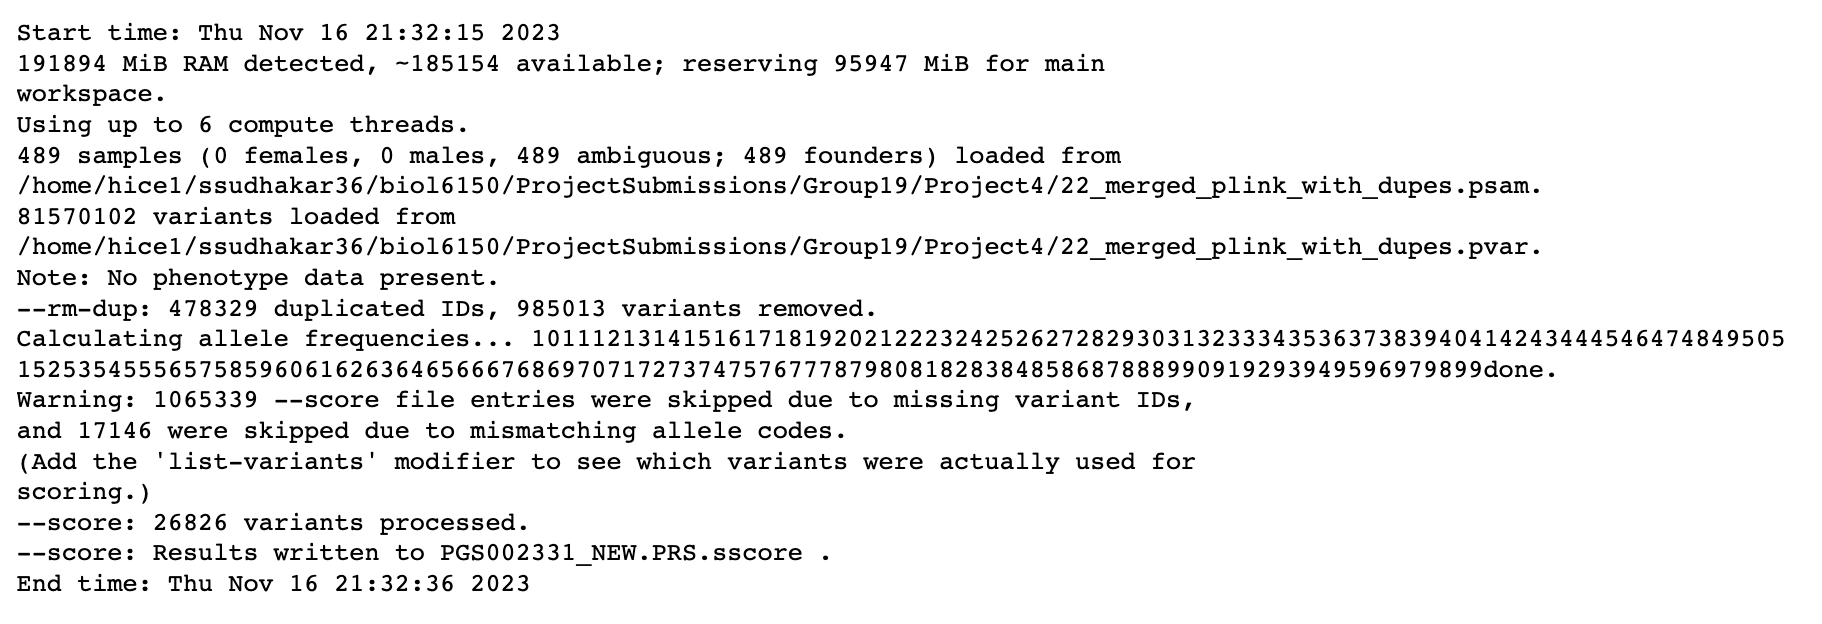

This screenshot is from question 4.2, but the 81570102 variants represents the total n and the 26826 variants represents overlapping n. The percent overlap is 26826 / 81570102 * 100 = 0.03%.

<div class="alert alert-block alert-warning">
    <h3>4.2 Calculate polygenic risk scores</h3>
    <p>Calculate the polygenic risk scores (for the disease of interest) for all the individuals belonging to the continental population of interest</p>
</div>

In [1]:
!cat ~/biol6150/ProjectSubmissions/Group19/Project4/PGS002331.forPlink_NEW.txt | head

1:752721	A	-0.0005709557
1:754182	A	-9.78091e-05
1:760912	C	-0.0006329943
1:768448	G	3.77846e-05
1:779322	A	9.01303e-05
1:838555	C	-0.0002124052
1:846808	C	-0.0003217294
1:853954	C	0.0002539321
1:854250	A	-0.0004632088
1:861808	A	-0.0012768829
cat: write error: Broken pipe


In [2]:
###All the work here.
!plink2 --pfile ~/biol6150/ProjectSubmissions/Group19/Project4/22_merged_plink_with_dupes --rm-dup exclude-all --score PGS002331.forPlink_NEW.txt 1 2 3 --out PGS002331_NEW.PRS

PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)     www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to PGS002331_NEW.PRS.log.
Options in effect:
  --out PGS002331_NEW.PRS
  --pfile /home/hice1/ssudhakar36/biol6150/ProjectSubmissions/Group19/Project4/22_merged_plink_with_dupes
  --rm-dup exclude-all
  --score PGS002331.forPlink_NEW.txt 1 2 3

Start time: Fri Nov 17 19:00:36 2023
191894 MiB RAM detected, ~186218 available; reserving 95947 MiB for main
workspace.
Using up to 6 compute threads.
489 samples (0 females, 0 males, 489 ambiguous; 489 founders) loaded from
/home/hice1/ssudhakar36/biol6150/ProjectSubmissions/Group19/Project4/22_merged_plink_with_dupes.psam.
81570102 variants loaded from
/home/hice1/ssudhakar36/biol6150/ProjectSubmissions/Group19/Project4/22_merged_plink_with_dupes.pvar.
Note: No phenotype data present.
--rm-dup: 478329 duplicated IDs, 985013 variants removed.
Calculating allele frequencies... 10111

In [13]:
#Show the scores file in the end.
!head PGS002331_NEW.PRS.sscore

#IID	ALLELE_CT	NAMED_ALLELE_DOSAGE_SUM	SCORE1_AVG
HG03009	53652	29285	-1.79935e-05
HG03585	53652	29190	-1.58992e-05
HG03600	53652	29700	-1.72224e-05
HG03802	53652	29692	-2.13616e-05
HG03589	53652	29409	-1.41424e-05
HG03604	53652	29307	-1.75388e-05
HG03611	53652	29635	-1.72105e-05
HG03616	53652	29264	-1.41556e-05
HG03814	53652	29484	-2.07707e-05


<div class="alert alert-block alert-warning">
    <h3>4.3 Visualize the scores by populations in the continental populations of interest</h3>
    <p>You might want to scale the scores and use boxplots (or anything else you think that looks good).</p>
</div>

In [3]:
!grep -v "Sample name" tr/Subpop_list.txt > all_samples.csv

In [4]:
import pandas as pd
from scipy.stats import zscore
import seaborn as sns
from matplotlib.legend_handler import HandlerTuple

In [5]:
dfs_list = []
subpop_list = ['tr/igsr-beb.tsv.tsv', 'tr/igsr-gih.tsv.tsv', 'tr/igsr-itu.tsv.tsv', 'tr/igsr-pjl.tsv.tsv', 'tr/igsr-stu.tsv.tsv']
for subpop in subpop_list:
    sp = pd.read_csv(subpop, sep='\t')
    sp = sp.filter(['Sample name','Population code'])
    dfs_list.append(sp)
df = pd.concat(dfs_list)
df.columns = ['#IID', 'POP']
df

,#IID,POP
0,HG03009,BEB
1,HG03008,BEB
2,HG03617,BEB
3,HG03585,BEB
4,HG03600,BEB
...,...,...
123,HG04047,STU
124,HG04100,STU
125,HG03885,STU
126,HG03986,STU


In [6]:
scores_df = pd.read_csv('~/biol6150/ProjectSubmissions/Group19/Project4/PGS002331_NEW.PRS.sscore', sep='\t')
df = scores_df.merge(df, on='#IID', how='left')
df['ScaledPRS'] = zscore(df['SCORE1_AVG'])
df

,#IID,ALLELE_CT,NAMED_ALLELE_DOSAGE_SUM,SCORE1_AVG,POP,ScaledPRS
0,HG03009,53652,29285,-0.000018,BEB,-0.963606
1,HG03585,53652,29190,-0.000016,BEB,-0.228601
2,HG03600,53652,29700,-0.000017,BEB,-0.692985
3,HG03802,53652,29692,-0.000021,BEB,-2.145659
4,HG03589,53652,29409,-0.000014,BEB,0.387958
...,...,...,...,...,...,...
484,HG04047,53652,29460,-0.000013,STU,0.732280
485,HG04100,53652,29557,-0.000015,STU,0.235362
486,HG03885,53652,29589,-0.000016,STU,-0.119980
487,HG03986,53652,29566,-0.000011,STU,1.587348


/storage/ice-shared/biol6150/SharedEnvironment/biol6150/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/ice-shared/biol6150/SharedEnvironment/biol6150/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/ice-shared/biol6150/SharedEnvironment/biol6150/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


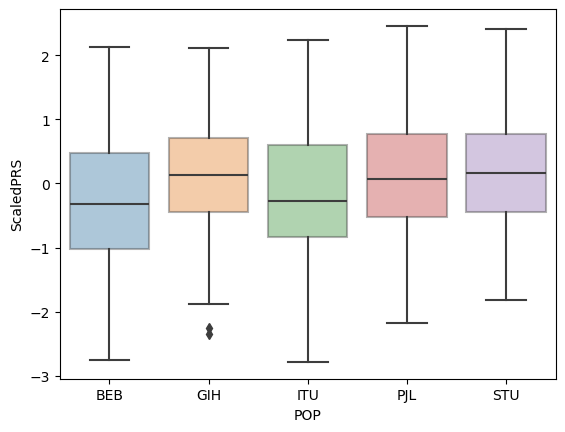

In [12]:
ax = sns.boxplot(data=df, x="POP", y="ScaledPRS", boxprops={'alpha': 0.4})